<a href="https://colab.research.google.com/github/Aidi379/Python_fundamental/blob/main/20.4%20Final_Capstone_Project_DATA%20VISUALIZATION%20FOR%20A%20SINGLE%20STOCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL CAPSTONE PROJECT OVERVIEW

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
from google.colab import files
uploaded = files.upload()
stock_df = pd.read_csv('Amazon.csv')
stock_df.head(15)

Saving Amazon.csv to Amazon.csv


,Date,Open,High,Low,Close,Volume,Adj Close
0,1/2/2018,58.599998,59.500000,58.525501,59.450500,53890000,59.450500
1,1/3/2018,59.415001,60.274502,59.415001,60.209999,62176000,60.209999
2,1/4/2018,60.250000,60.793499,60.233002,60.479500,60442000,60.479500
3,1/5/2018,60.875500,61.457001,60.500000,61.457001,70894000,61.457001
4,1/8/2018,61.799999,62.653999,61.601501,62.343498,85590000,62.343498
5,1/9/2018,62.845001,62.966499,62.088001,62.634998,73226000,62.634998
6,1/10/2018,62.257500,62.716499,61.861500,62.716499,53720000,62.716499
7,1/11/2018,62.987000,63.838501,62.823002,63.834000,62500000,63.834000
8,1/12/2018,63.669498,65.288002,63.669498,65.260002,108874000,65.260002
9,1/16/2018,66.150002,66.997002,64.614998,65.242996,144414000,65.242996


In [ ]:
stock_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [3]:
stock_df['Daily Return'] = stock_df['Adj Close'].pct_change(1) * 100
stock_df['Daily Return'].replace(np.nan, 0, inplace = True)

In [4]:
# Matplotlib is a comprehensive data visualization library in Python
# Seaborn is a visualization library that sits on top of matplotlib and offers enhanced features
# plotly.express module contains functions that can create interactive figures using a few lines of code
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import plotly.express as px

# PERFORM DATA VISUALIZATION FOR A SINGLE STOCK: PART 2

In [5]:
# Define a function that classifies the returns based on the magnitude
# Feel free to change these numbers
def percentage_return_classifier(percentage_return):

    if percentage_return > -0.3 and percentage_return <= 0.3:
        return 'Insignificant Change'
    elif percentage_return > 0.3 and percentage_return <= 3:
        return 'Positive Change'
    elif percentage_return > -3 and percentage_return <= -0.3:
        return 'Negative Change'
    elif percentage_return > 3 and percentage_return <= 7:
        return 'Large Positive Change'
    elif percentage_return > -7 and percentage_return <= -3:
        return 'Large Negative Change'
    elif percentage_return > 7:
        return 'Bull Run'
    elif percentage_return <= -7:
        return 'Bear Sell Off'

In [6]:
# Apply the function to the "Daily Return" Column and place the result in "Trend" column
stock_df['Trend'] = stock_df['Daily Return'].apply(percentage_return_classifier)
stock_df

,Date,Open,High,Low,Close,Volume,Adj Close,Daily Return,Trend
0,1/2/2018,58.599998,59.500000,58.525501,59.450500,53890000,59.450500,0.000000,Insignificant Change
1,1/3/2018,59.415001,60.274502,59.415001,60.209999,62176000,60.209999,1.277531,Positive Change
2,1/4/2018,60.250000,60.793499,60.233002,60.479500,60442000,60.479500,0.447601,Positive Change
3,1/5/2018,60.875500,61.457001,60.500000,61.457001,70894000,61.457001,1.616252,Positive Change
4,1/8/2018,61.799999,62.653999,61.601501,62.343498,85590000,62.343498,1.442468,Positive Change
...,...,...,...,...,...,...,...,...,...
1245,12/12/2022,89.209999,90.580002,87.870003,90.550003,61999800,90.550003,1.638800,Positive Change
1246,12/13/2022,95.230003,96.250000,90.519997,92.489998,100212000,92.489998,2.142457,Positive Change
1247,12/14/2022,92.500000,93.459999,89.870003,91.580002,70298000,91.580002,-0.983886,Negative Change
1248,12/15/2022,89.889999,89.970001,87.470001,88.449997,84802900,88.449997,-3.417782,Large Negative Change


In [7]:
# Count distinct values in the Trend column
trend_summary = stock_df['Trend'].value_counts()
trend_summary

Positive Change          470
Negative Change          405
Insignificant Change     190
Large Positive Change     86
Large Negative Change     82
Bear Sell Off              9
Bull Run                   8
Name: Trend, dtype: int64

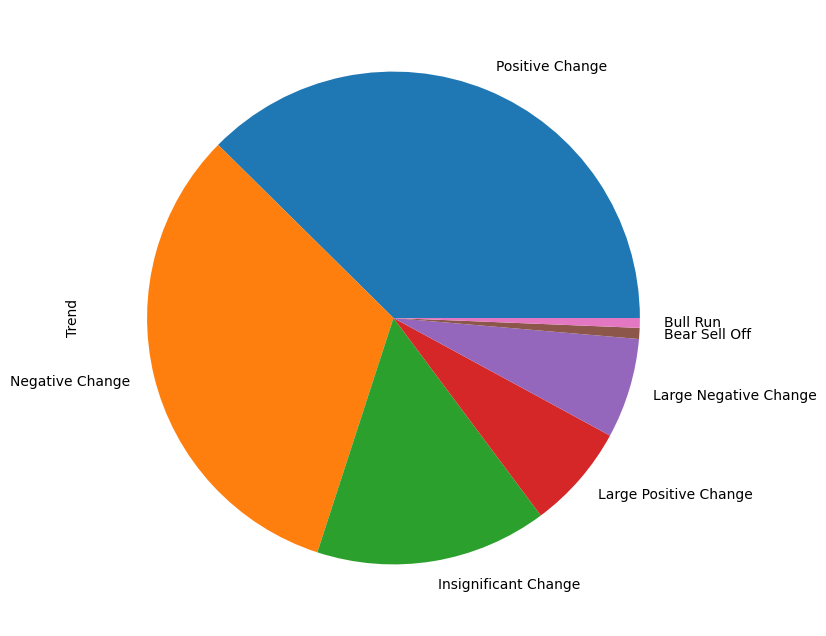

In [8]:
# Plot a pie chart using Matplotlib Library
plt.figure(figsize = (8, 8))
trend_summary.plot(kind = 'pie', y = 'Trend');

**PRACTICE OPPORTUNITY:**
- **Using Matplotlib library, plot a similar pie chart for JPMorgan Chase & Co. stock starting from July 14th, 2017 until December 16th, 2022.**

In [9]:
from google.colab import files
uploaded = files.upload()
JPM_df = pd.read_csv('JPM.csv')
JPM_df

Saving JPM.csv to JPM.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200
1,7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200
2,7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400
3,7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200
4,7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700
...,...,...,...,...,...,...,...
1363,12/12/2022,132.399994,134.649994,131.600006,134.210007,134.210007,8841600
1364,12/13/2022,136.889999,137.089996,133.080002,134.080002,134.080002,10025400
1365,12/14/2022,133.779999,135.710007,132.759995,133.410004,133.410004,9966100
1366,12/15/2022,131.149994,132.080002,129.050003,130.100006,130.100006,12087800


In [10]:
JPM_df['Daily Return'] = JPM_df['Adj Close'].pct_change(1)*100
JPM_df['Daily Return'].replace(np.nan, 0, inplace = True)
JPM_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200,0.000000
1,7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200,-0.932243
2,7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400,-0.350140
3,7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200,0.142732
4,7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700,0.000000
...,...,...,...,...,...,...,...,...
1363,12/12/2022,132.399994,134.649994,131.600006,134.210007,134.210007,8841600,1.551152
1364,12/13/2022,136.889999,137.089996,133.080002,134.080002,134.080002,10025400,-0.096867
1365,12/14/2022,133.779999,135.710007,132.759995,133.410004,133.410004,9966100,-0.499700
1366,12/15/2022,131.149994,132.080002,129.050003,130.100006,130.100006,12087800,-2.481072


In [11]:
JPM_df['Trend'] = JPM_df['Daily Return'].apply(percentage_return_classifier)
JPM_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend
0,7/14/2017,90.809998,92.610001,90.580002,92.250000,79.338943,22235200,0.000000,Insignificant Change
1,7/17/2017,91.820000,91.989998,91.250000,91.389999,78.599312,14374200,-0.932243,Negative Change
2,7/18/2017,90.449997,91.580002,90.320000,91.070000,78.324104,14719400,-0.350140,Negative Change
3,7/19/2017,91.339996,91.620003,91.000000,91.199997,78.435898,11651200,0.142732,Insignificant Change
4,7/20/2017,91.150002,91.720001,90.900002,91.199997,78.435898,11561700,0.000000,Insignificant Change
...,...,...,...,...,...,...,...,...,...
1363,12/12/2022,132.399994,134.649994,131.600006,134.210007,134.210007,8841600,1.551152,Positive Change
1364,12/13/2022,136.889999,137.089996,133.080002,134.080002,134.080002,10025400,-0.096867,Insignificant Change
1365,12/14/2022,133.779999,135.710007,132.759995,133.410004,133.410004,9966100,-0.499700,Negative Change
1366,12/15/2022,131.149994,132.080002,129.050003,130.100006,130.100006,12087800,-2.481072,Negative Change


In [12]:
JPM_df['Trend'].value_counts()

Positive Change          501
Negative Change          495
Insignificant Change     262
Large Positive Change     53
Large Negative Change     44
Bull Run                   7
Bear Sell Off              6
Name: Trend, dtype: int64

<Axes: ylabel='Trend'>

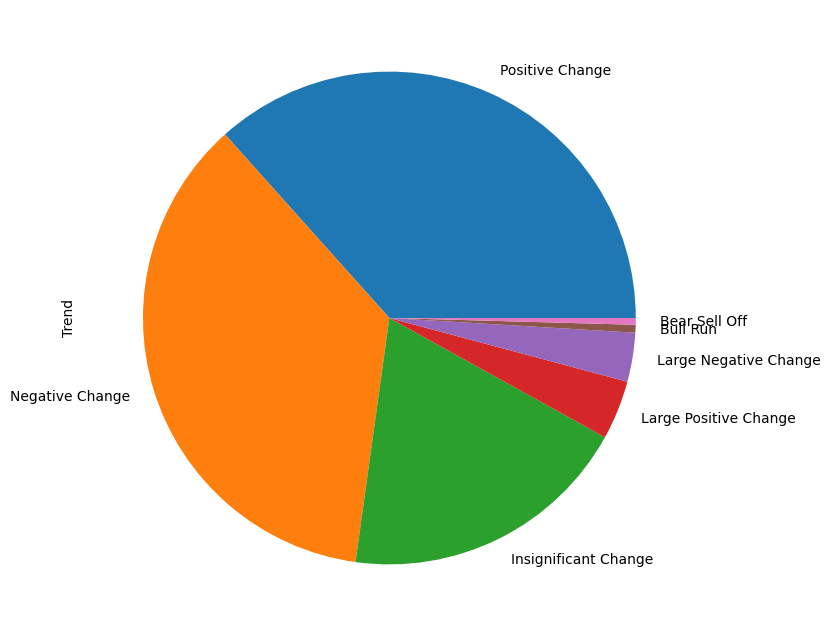

In [19]:
plt.figure(figsize = (8, 8))
JPM_df['Trend'].value_counts().plot(kind = 'pie', y = 'Trend')